# Description

Aggregated information of over three thousand incidents of gun violence within the United States from Jan 2014 through Sep 2021.

Address of the incident is mentioned along with the number of causalities or injuries.

This data along with the latest events available at the Gun Violence Archive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import folium
from folium.plugins import FastMarkerCluster
from fbprophet import Prophet
import spacy
import string
import random
import re
import folium.plugins as plugins

In [2]:
df = pd.read_csv('../input/us-gun-violence-archive-2014/US-Gun-Violence.csv')

In [3]:
df

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0
...,...,...,...,...,...,...,...
3225,95550,January 12 2014,Alabama,Huntsville,University Drive,0,5.0
3226,95146,January 11 2014,Mississippi,Jackson,3430 W. Capitol Street,0,4.0
3227,94514,January 5 2014,Pennsylvania,Erie,829 Parade St,1,3.0
3228,92704,January 3 2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3.0


In [4]:
df.isnull().sum()

incident_id       0
incident_date     0
state             0
city_or_county    0
address           5
killed            0
injured           2
dtype: int64

In [5]:
df = df.dropna(axis = 0)

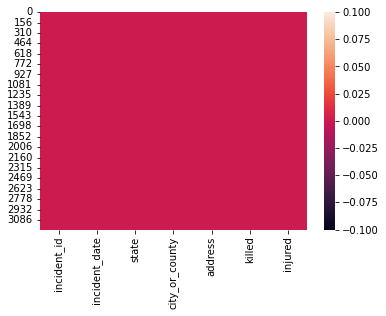

In [6]:
sns.heatmap(df.isnull());

In [7]:
temp = df.describe()
temp.style.background_gradient(cmap='Purples')

,incident_id,killed,injured
count,3223.000000,3223.000000,3223.000000
mean,1189798.612783,1.057400,4.191126
std,626646.772005,2.082142,8.028508
min,92194.000000,0.000000,0.000000
25%,610670.000000,0.000000,3.000000
50%,1232044.000000,1.000000,4.000000
75%,1750579.500000,1.000000,5.000000
max,2128682.000000,59.000000,441.000000


In [8]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [9]:
g1 = [go.Box(y=df.killed,name="killed",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=df.injured,name="injured",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Killed / Injured",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2,layout=layout2)
iplot(fig2)

# **GRAPH WITH RAW DATA**

In [10]:
fig1 = px.histogram(df,x='state',color='state',template='plotly_dark')
fig1.show()

In [11]:
fig2 = px.histogram(df,x='city_or_county',color='city_or_county',template='plotly_dark')
fig2.show()

**As in the old days Chicago leads the way in violence towards homicide.**

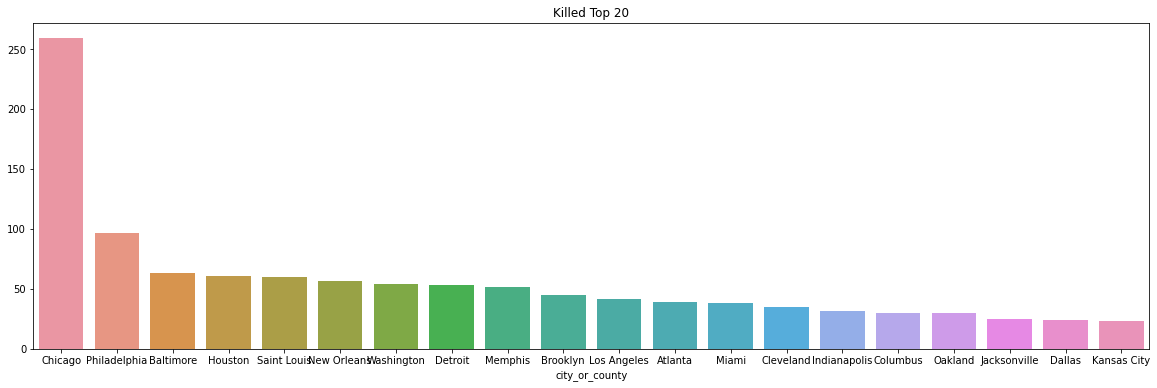

In [12]:
plt.figure(figsize=(20,6))
top_30 = df.groupby('city_or_county')['killed'].count() \
.sort_values(ascending = False).head(20)
sns.barplot(x=top_30.index, y = top_30.values)
plt.title('Killed Top 20')
plt.show()

**Among the States Illinois followed by California are among those with the highest number of homicides.**

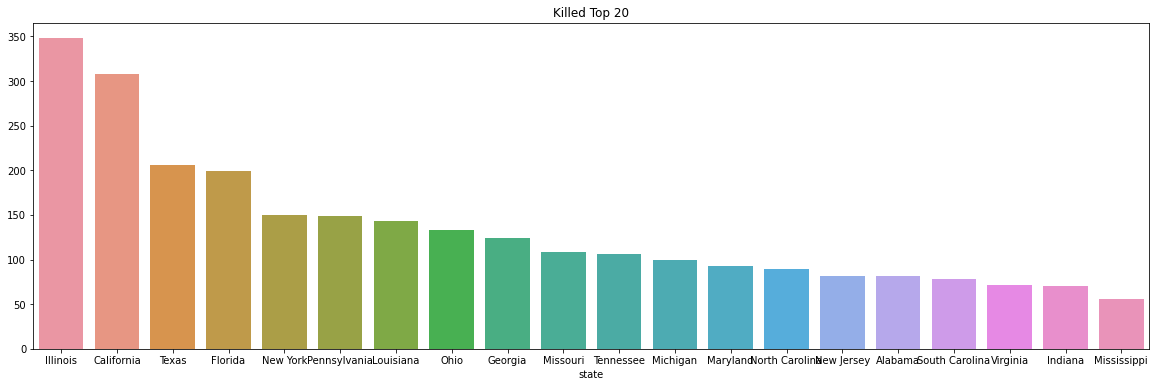

In [13]:
plt.figure(figsize=(20,6))
top_30 = df.groupby('state')['killed'].count() \
.sort_values(ascending = False).head(20)
sns.barplot(x=top_30.index, y = top_30.values)
plt.title('Killed Top 20')
plt.show()

**In the injuried Chicago still dominates, we can see a relationship between the homicides and the injuried**

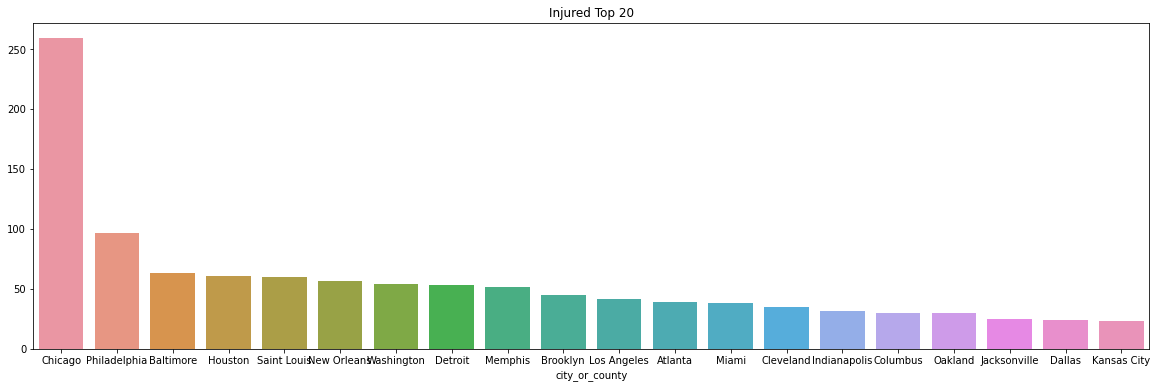

In [14]:
plt.figure(figsize=(20,6))
top_30 = df.groupby('city_or_county')['injured'].count() \
.sort_values(ascending = False).head(20)
sns.barplot(x=top_30.index, y = top_30.values)
plt.title('Injured Top 20')
plt.show()

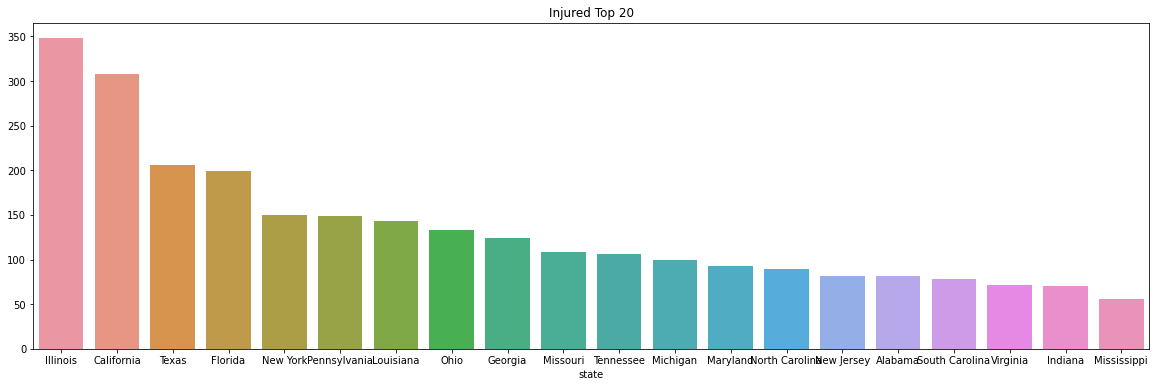

In [15]:
plt.figure(figsize=(20,6))
top_30 = df.groupby('state')['injured'].count() \
.sort_values(ascending = False).head(20)
sns.barplot(x=top_30.index, y = top_30.values)
plt.title('Injured Top 20')
plt.show()

**The following database is the same, but I did a treatment on it to get the location of the crimes, unfortunately due to the fact that some addresses are incomplete it was not possible to get all the locations, but there is a significant amount in which it is possible to get a sense of the map of violence.**

In [16]:
df_t = pd.read_csv('../input/data-tratada/violence_usa_tratada.csv')
df_t = df_t.dropna(axis = 0)
df_t = df_t.drop(df_t[df_t.seller_latitude < 20].index)
df_t = df_t.drop(df_t[df_t.seller_longitude > -73].index)

**We can verify that the cases of crimes are intensified.**

In [17]:
map_1 = folium.Map(location=[35, -95], tiles='cartodbpositron', zoom_start=4)
HeatMap(data=df_t[['seller_latitude', 'seller_longitude']], radius=0).add_to(map_1)
map_1

**On this map you can see in detail the location of the occurrence of the criminal event and the date.**

In [18]:
f = folium.Figure(width=1200, height=750)
map = folium.Map(location = [25, -95], 
                      zoom_start = 4).add_to(f)
price=folium.map.FeatureGroup()
price=plugins.MarkerCluster().add_to(map)
for latitude,longitude,label in zip(df_t.seller_latitude,df_t.seller_longitude,df_t.incident_date):
    folium.Marker(location=[latitude,longitude],icon=None,popup=label).add_to(price)
map.add_child(price)
map

In [19]:
class color:
   DARKCYAN = '\033[36m'
   BLUE = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [20]:
print(color.BLUE + '\033[4m' + '\033[1m' +'Total number of people murdered in the period: ', df.killed.sum(),'' +  color.END)
print(color. DARKCYAN + '\033[1m' + '\033[4m' +'Total number of people who suffered injuries in the period: ', int(df.injured.sum()),'' +  color.END)

Total number of people murdered in the period:  3408 
Total number of people who suffered injuries in the period:  13508 


**Unfortunately, the escalation of violence affects not only poor countries, but also rich ones.**

**The United States has one of the lowest unemployment rates in its history and crime has increased, making it evident that there is no direct correlation between unemployment and violence, but rather that some public policies must be taken.**

**Remembering that the United States has the largest prison population in the world, that is, prisons and strict laws do not reduce crime.**

**We can see an increase in crime in the hot months, I believe it makes people more on the streets, go out and drink more.**

# **If you find this notebook useful, support with an upvote** 👍